<a href="https://colab.research.google.com/github/OliviaIntan/IPSD-Assignment/blob/main/Tugas%206/Guided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catatan

Clustering: Mengelompokkan data yang tidak memiliki label

Supervised ada label (x, y)

Unsupervised hanya ada satu label (x), untuk menentukan y dia dikelompokkan

Clustering

1. exclusive clustering atau hard clustering: dipaksa masuk ke kelompok yang terdekat
2. overlapping clustering
3. hierarchical clustering atau multi level hierarchy
4. density based clustering

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('fivethirtyeight')

# Load Data

In [ ]:
data = pd.read_csv('/content/Dataset-Praktikum (2) - Dataset-Praktikum (2).csv')
data.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [ ]:
data.shape

(200, 5)

# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IDPelanggan                 200 non-null    int64 
 1   Kelamin                     200 non-null    object
 2   Usia                        200 non-null    int64 
 3   Pendapatan (juta Rp)        200 non-null    int64 
 4   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

,0
IDPelanggan,0
Kelamin,0
Usia,0
Pendapatan (juta Rp),0
Rating_pengeluaran (1-100),0


In [ ]:
data.describe()

,IDPelanggan,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


terlihat yang paling banyak perempuan

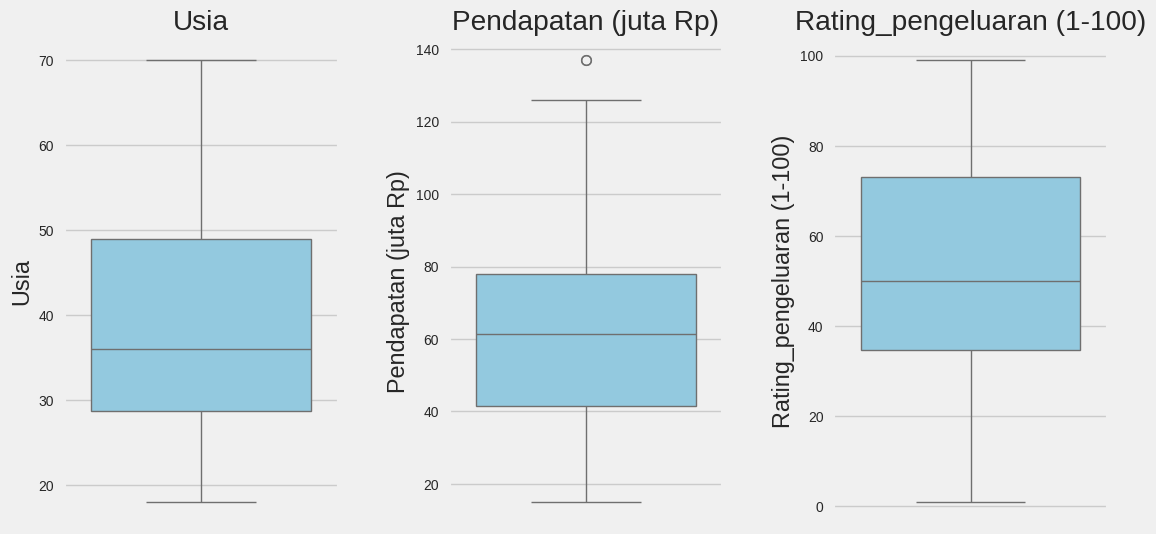

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
  # Definisikan variabel yang akan divisualisasikan
  variables = ['Usia', 'Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)']

  # Buat figure dan axes untuk subplot dengan ukuran 1x3
  fig, axes = plt.subplots(1, 3, figsize=(12, 6)) # Sesuaikan ukuran figure
  fig.subplots_adjust(hspace=0.4, wspace=0.4) # Atur jarak antar subplot

  # Iterasi melalui setiap variabel dan buat boxplot
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color='skyblue', ax=axes[i]) # Perhatikan perubahan di sini
    axes[i].set_title(var) # Tambahkan judul untuk setiap plot

  # Tampilkan plot
  plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

In [ ]:
data.drop(['IDPelanggan'], axis=1, inplace=True)
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,Laki,19,15,39
1,Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40


In [ ]:
# Melakukan encoding biar jadi numerik di kolom jenis kelamin biar bisa diolah

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Kelamin'] = le.fit_transform(data['Kelamin'])
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# instantiate
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

# K-Means

<function matplotlib.pyplot.show(close=None, block=None)>

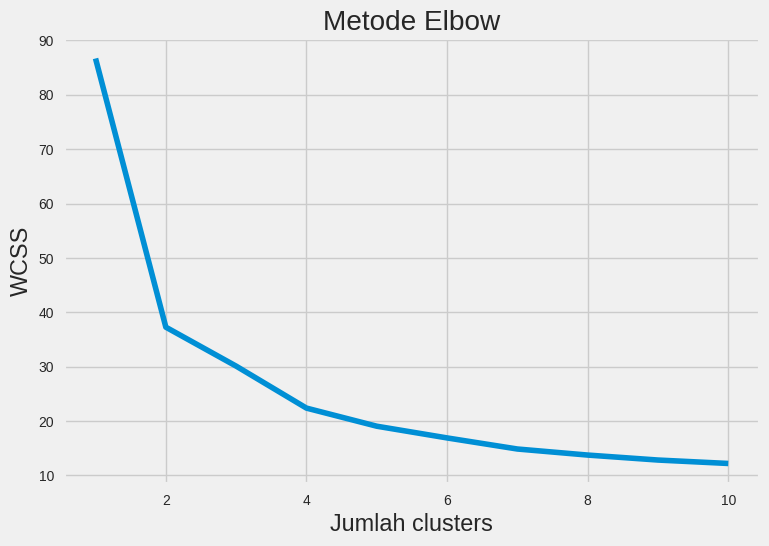

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

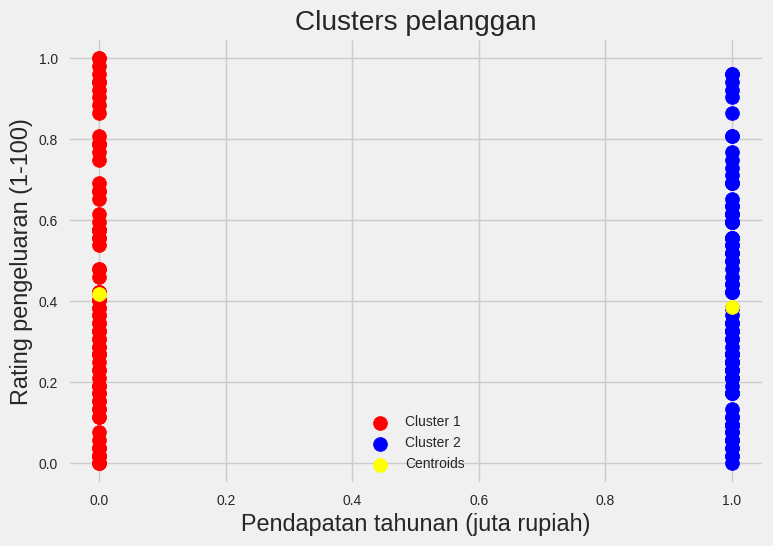

In [ ]:
# Visualisasi hasil cluster
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show

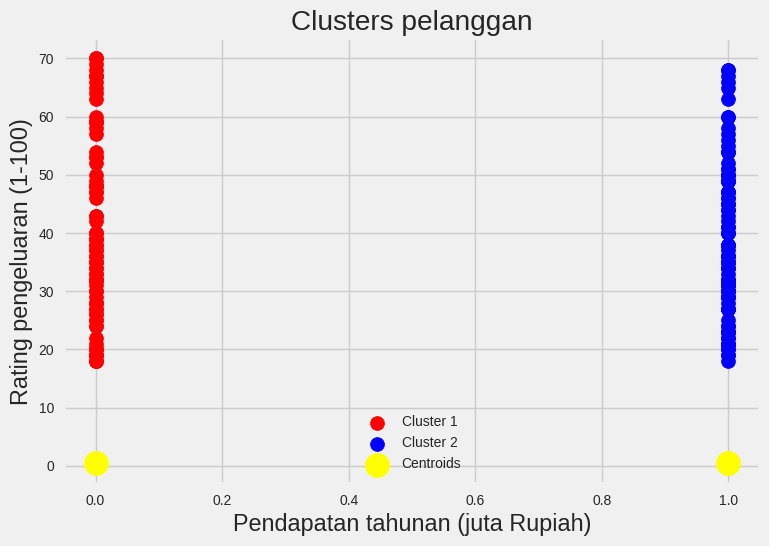

In [ ]:
data['Hasil_cluster'] = model1.labels_
# Visualisasi hasil clusters
plt.scatter(data.values[y_pred1 == 0, 0], data.values[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(data.values[y_pred1 == 1, 0], data.values[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

# DBSCAN

In [ ]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps = 1, min_samples = 5)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [ ]:
# Tambahkan label tersebut menjadi kolom baru di dataset
data[' Hasil_cluster'] = model2.labels_
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil_cluster,Hasil_cluster
0,0,19,15,39,0,0
1,0,21,15,81,0,0
2,1,20,16,6,1,1
3,1,23,16,77,1,1
4,1,31,17,40,1,1


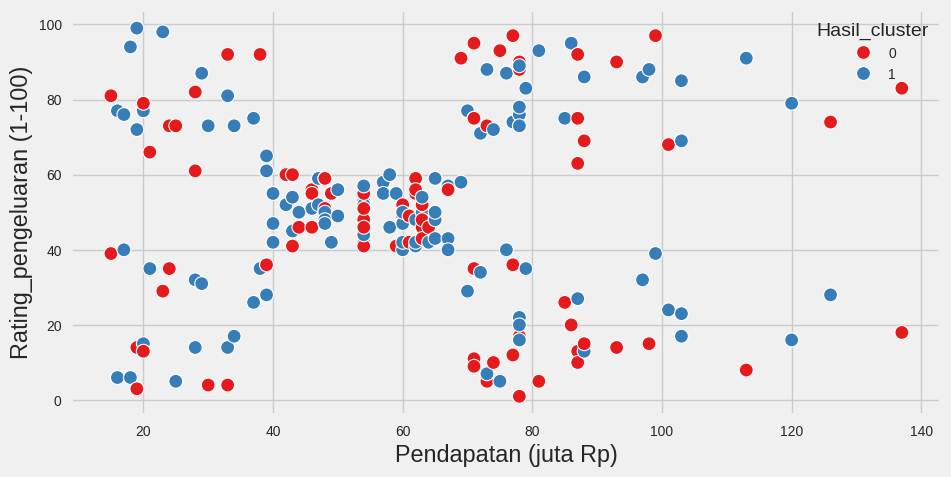

In [ ]:
# Tambahkan label tersebut menjadi kolom baru di dataset
# Perbaiki nama kolom dengan menghapus spasi di awal
data['Hasil_cluster'] = model2.labels_
data.head()

plt.figure(figsize = (10,5))

sns.scatterplot(x = 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s = 100);
                # perbaiki palette agar sesuai dengan format yang benar

# Matriks evaluasi
# 1. Silhouette_Score

In [ ]:
# Menghitung silhouette_score algoritma k-means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print('Silhouette Score:', Evaluasi_KMeans)

Silhouette Score: 0.5194624832665107


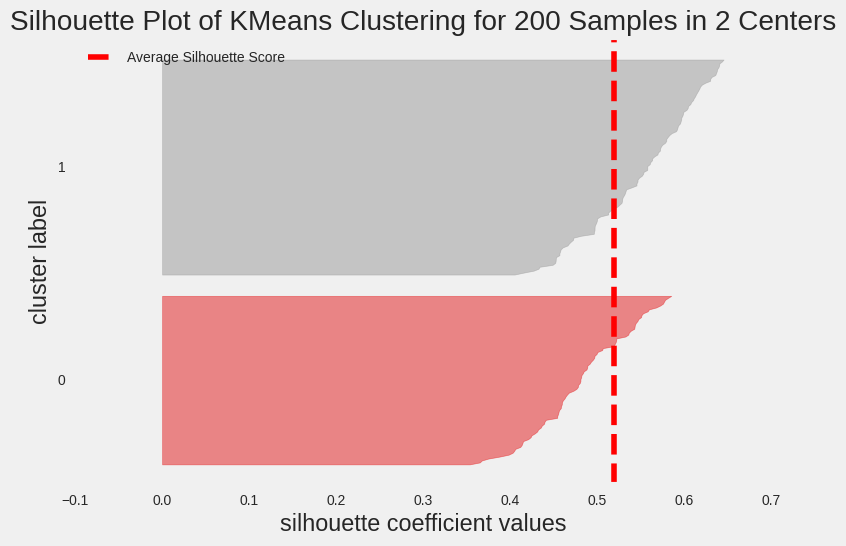

In [ ]:
# Membuat Silhouette vizualitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [ ]:
# Menghitung algoritma Silhouette_score algoritma db-scan
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print('Silhouette Score:', Evaluasi_DBScan)

Silhouette Score: 0.5194624832665107


# 2. Davies-Bouldin Index (DBI)

In [ ]:
# Menghitung Davies Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print('Davies-Bouldin Index (DBI):', dbi_score1)

Davies-Bouldin Index (DBI): 0.8172534497318451


In [ ]:
# Menghitung Davies Bouldin Index (DBI) algoritma db-scan
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print('Davies-Bouldin Index (DBI):', dbi_score2)

Davies-Bouldin Index (DBI): 0.8172534497318451
